<img width="1347" height="392" alt="image" src="https://github.com/user-attachments/assets/df0f71b5-7bae-4751-a85c-92f9cfbf61af" />
<a href="https://github.com/WilmaDarc/volta-zero-/tree/main">

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 22** | Descritiva III - Gráficos interativos | Exercício 2

**Aluno:** [Wilma Darc Alves de Farias](www.linkedin.com/in/wilma-farias-66a15962)<br>
**Data:** 21 de dezembro de 2025.

---

# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

### 0. Import das bibliotecas

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import graph_objects
from plotly.graph_objs import Layout
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#### 1. Carregue os dados da tarefa anterior

In [6]:
# Carregando o arquivo CSV
df = pd.read_csv('dados_ativos.csv', index_col=0, parse_dates=True)

# Exibindo as primeiras linhas
df.head()

C:\Users\wilma\AppData\Local\Temp\ipykernel_24020\1711849388.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('dados_ativos.csv', index_col=0, parse_dates=True)


,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
Price,,,,,,,,,,,,,,,
Ticker,ITUB4.SA,PETR4.SA,VALE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,14.739969253540039,10.602619171142578,53.03181838989258,14.945548158662785,10.650000800119772,54.371212581741226,14.452160511650638,10.39851256948269,53.03181838989257,14.506981361318655,10.402157417124569,53.7117134974553,36138190,52704700,18557200
2022-01-04,15.157979011535645,10.642711639404297,52.40631866455078,15.199093929107889,10.715606505590927,53.75930854147194,14.685148114175108,10.53701314493583,52.283937331796864,14.81534798900201,10.628132249056813,53.378568922765666,48343460,51739200,18178700
2022-01-05,14.87016773223877,10.230853080749512,52.90263748168945,15.226504659298985,10.668225066353225,53.494148101849085,14.753673797085565,10.183471451647852,52.440308593874455,15.137419708666314,10.639066980325218,52.60348715700076,34807190,78459800,22039000


#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu


In [7]:
# Selecionar colunas de fechamento (ajuste se suas colunas tiverem outros nomes)
close_cols = [c for c in df.columns if str(c).startswith('Adj Close') or str(c).startswith('Close')]
base = df[close_cols].iloc[:, :3].copy()          # pega as 3 primeiras colunas de fechamento
base.columns = ['ITUB4.SA','PETR4.SA','VALE3.SA']  # renomeia para os tickers

# Converter para numérico e calcular média móvel de 90 dias
base = base.apply(pd.to_numeric, errors='coerce')
media_movel_90d = base.rolling(window=90, min_periods=1).mean()

# Mostrar resultado
media_movel_90d.head()

,ITUB4.SA,PETR4.SA,VALE3.SA
Price,,,
Ticker,NaN,NaN,NaN
Date,NaN,NaN,NaN
2022-01-03,14.739969,10.602619,53.031818
2022-01-04,14.948974,10.622665,52.719069
2022-01-05,14.922705,10.492061,52.780258


2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima


In [9]:
# Calcular desvio padrão móvel de 90 dias
desvio_padrao_90d = base.rolling(window=90, min_periods=1).std()

# Visualizar as primeiras linhas
display(desvio_padrao_90d.head())


,ITUB4.SA,PETR4.SA,VALE3.SA
Price,,,
Ticker,NaN,NaN,NaN
Date,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN
2022-01-04,0.295578,0.028350,0.442295
2022-01-05,0.213900,0.227099,0.330220


3. Monte um gráfico de linhas para as médias móveis dos ativos da sua base


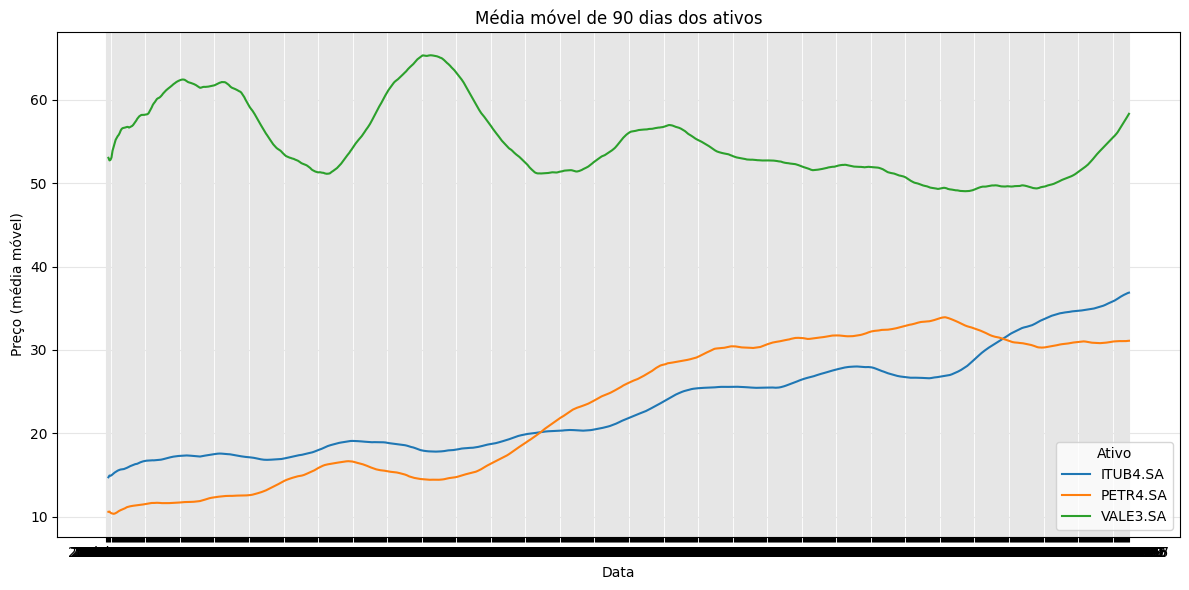

In [36]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,6), facecolor='white')
ax.set_facecolor('white')

for col in media_movel_90d.columns:
    ax.plot(media_movel_90d.index, media_movel_90d[col], label=col)

ax.set_title('Média móvel de 90 dias dos ativos')
ax.set_xlabel('Data')
ax.set_ylabel('Preço (média móvel)')
legend = ax.legend(title='Ativo', frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#cccccc')
ax.grid(True, color='#e6e6e6')
plt.tight_layout()
plt.show()



4. Monte um gráfico de linhas para os desvios padrão em janela móvel

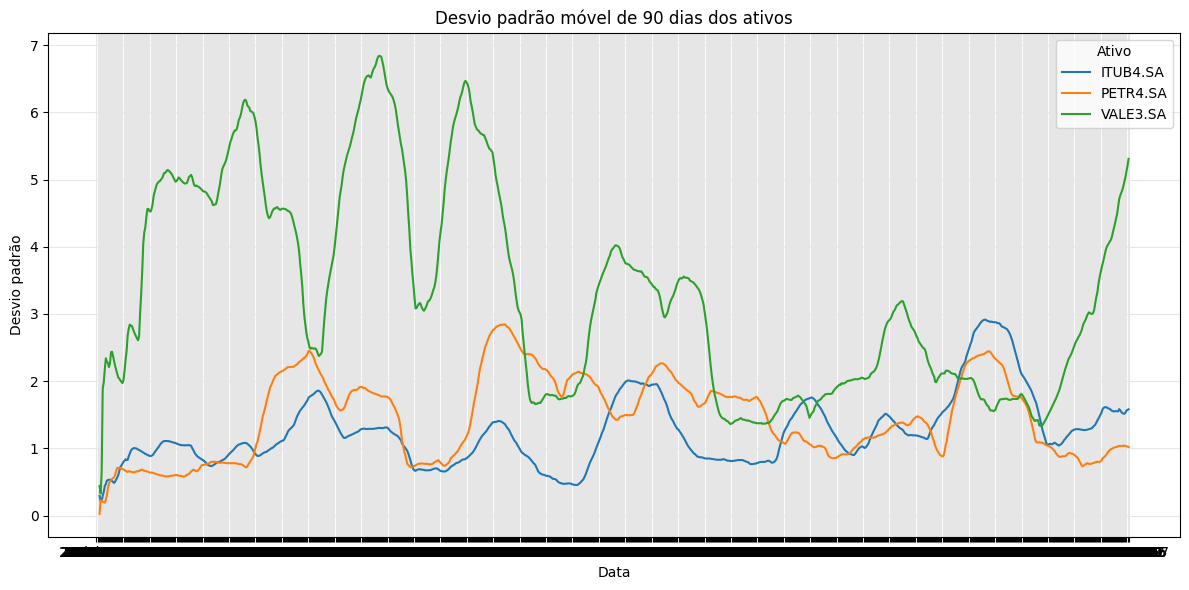

In [13]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,6), facecolor='white')
ax.set_facecolor('white')

for col in desvio_padrao_90d.columns:
    ax.plot(desvio_padrao_90d.index, desvio_padrao_90d[col], label=col)

ax.set_title('Desvio padrão móvel de 90 dias dos ativos')
ax.set_xlabel('Data')
ax.set_ylabel('Desvio padrão')
legend = ax.legend(title='Ativo', frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#cccccc')
ax.grid(True, color='#e6e6e6')
plt.tight_layout()
plt.show()


5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

```sql
 Após comparar os dados de séries temporais através dos gráficos de média móvel e desvio padrão com o gráfico da tarefa anterior, que apresentou o ativo VALE3.SA foi o mais volátil entre os três, pois apresentou as maiores variações de valor ao longo do período analisado, fica evidente, que VALE3.SA tende a apresentar picos de volatilidade mais pronunciados; PETR4.SA mostra volatilidade moderada; ITUB4.SA costuma ser o menos volátil entre os três — isso aparece como picos de desvio padrão mais altos para VALE3.SA e picos menores para ITUB4.SA.

 Portanto, podemos concluir os três gráficos são coerentes entre si. O gráfico de desvio padrão confirma quantitativamente (picos) o que se observa qualitativamente no gráfico de preços; a média móvel confirma as tendências de longo prazo e ajuda a contextualizar os picos de volatilidade.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base.


In [22]:
ticker = 'VALE3.SA'
ohlc = df[['Open.2','High.2','Low.2','Close.2']].copy()
ohlc.columns = ['Open','High','Low','Close']
ohlc.index = pd.to_datetime(ohlc.index, errors='coerce')
ohlc = ohlc[~ohlc.index.isna()]

start = ohlc.index.max() - pd.Timedelta(days=60)
ohlc_60 = ohlc[(ohlc.index >= start) & (ohlc.index <= ohlc.index.max())].copy()

print(ticker)
display(ohlc_60)

VALE3.SA


C:\Users\wilma\AppData\Local\Temp\ipykernel_24020\1700762680.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlc.index = pd.to_datetime(ohlc.index, errors='coerce')


,Open,High,Low,Close
Price,,,,
2025-10-20,57.14822788842621,58.298033410973865,57.14822788842621,57.87042236328125
2025-10-21,57.63285863316244,58.01295774218363,57.556836636401215,57.775394439697266
2025-10-22,58.164998534201935,59.143761812522115,58.13649209767312,58.80167007446289
2025-10-23,59.12475272256067,59.42883344349582,58.60211058508328,58.6876335144043
2025-10-24,58.90619796048208,59.039232829617156,58.27903098818225,58.65913009643555
2025-10-27,58.97271595701857,59.06773982875533,58.34554897874227,58.592613220214844
2025-10-28,58.59260964698719,59.428833442001874,58.516591279219384,59.10574722290039
2025-10-29,59.694903766125705,60.521623007892465,59.590375337583026,60.179534912109375
2025-10-30,59.970480296243444,60.816205067981535,59.799434429495484,60.635658264160156


2. Monte um gráfico de *candlestick* para esses dados.

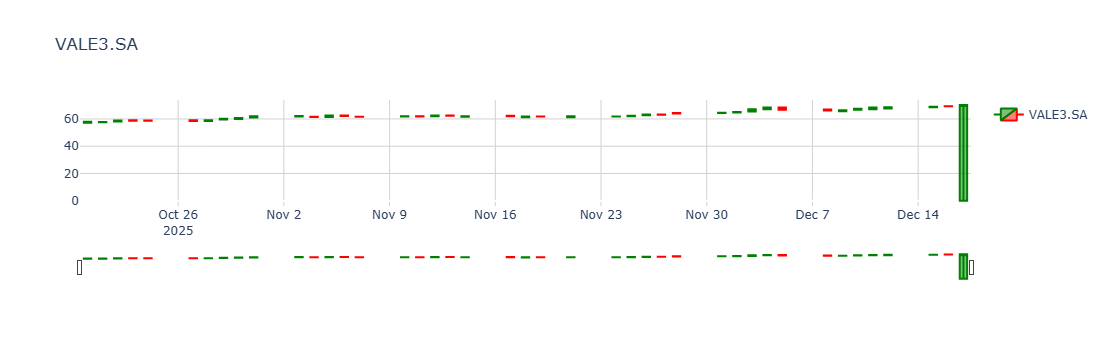

In [33]:
# trace candlestick (VALE3.SA)
graph = graph_objects.Candlestick(
    x=ohlc_60.index,
    open=ohlc_60['Open'],
    high=ohlc_60['High'],
    low=ohlc_60['Low'],
    close=ohlc_60['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='VALE3.SA'
)

# layout no estilo do professor (fundo transparente)
layout = Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

# figura final
grafico = graph_objects.Figure(data=[graph], layout=layout)
grafico.update_layout(title='VALE3.SA', showlegend=True)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico.show()